1. Install Required Libraries

In [88]:
!pip install kagglehub pandas matplotlib scikit-learn seaborn --quiet

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



2. Download Dataset Using kagglehub

In [89]:
path = kagglehub.dataset_download("vetrirah/customer")
print("📁 Dataset path:", path)


📁 Dataset path: /kaggle/input/customer


3. Load Dataset (Train.csv)

In [91]:
# Load the training dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/vetrirah/customer/versions/1/Train.csv")
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


 4. Dataset Overview (Info, Describe, Null Check)

In [92]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696 

5. Select Features for Clustering

In [94]:
# Select useful features for segmentation (you can modify based on EDA)
features = ['Gender', 'Age', 'Spending_Score', 'Family_Size', 'Ever_Married']

df_cluster = df[features].copy()


6. Encode Categorical Features and Handle Missing Values

In [95]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values
df_cluster.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df_cluster.select_dtypes(include='object'):
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col])
    label_encoders[col] = le

df_cluster.head()


/tmp/ipython-input-330368584.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cluster.fillna(method='ffill', inplace=True)


,Gender,Age,Spending_Score,Family_Size,Ever_Married
0,1,22,2,4.0,0
1,0,38,0,3.0,1
2,0,67,2,1.0,1
3,1,67,1,2.0,1
4,0,40,1,6.0,1


7. Standardize Features

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)


8. Elbow Method for Optimal Clusters (Plot Inertia)

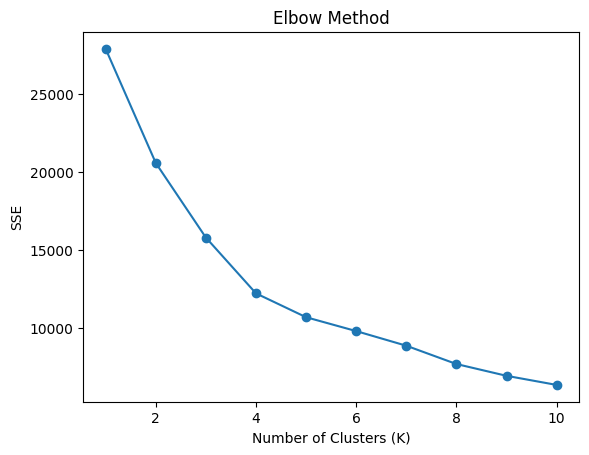

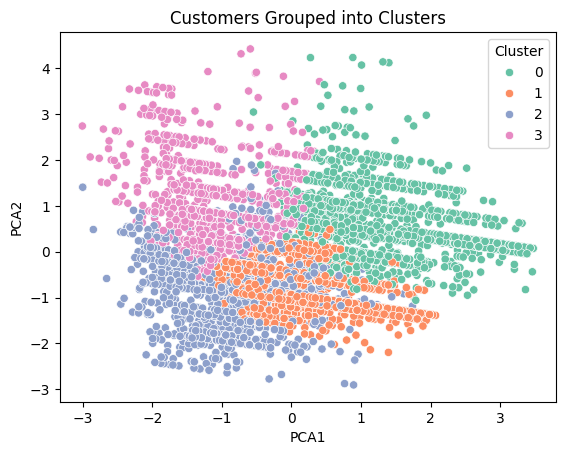

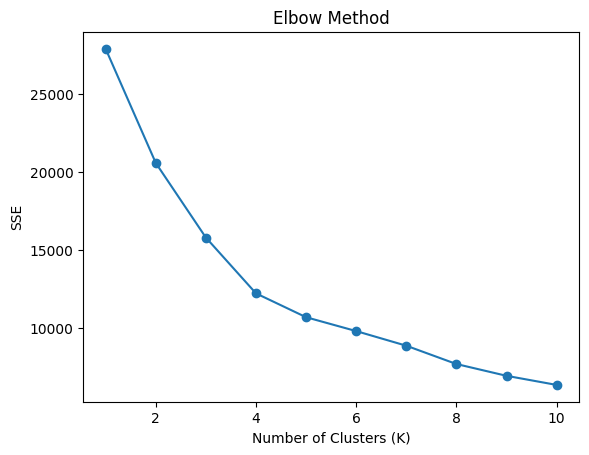

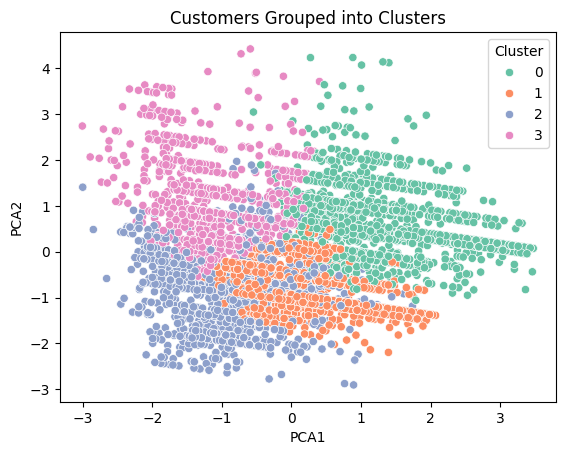

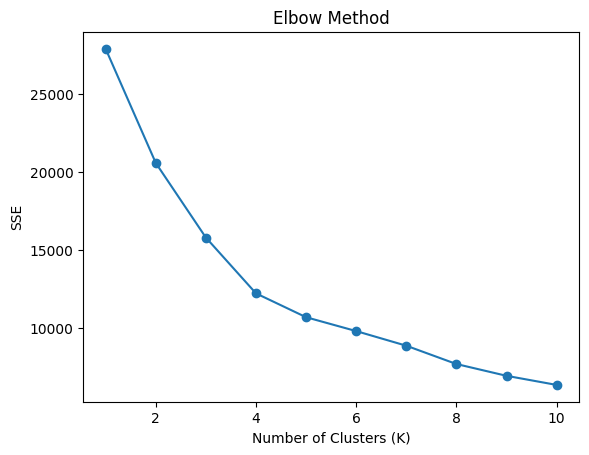

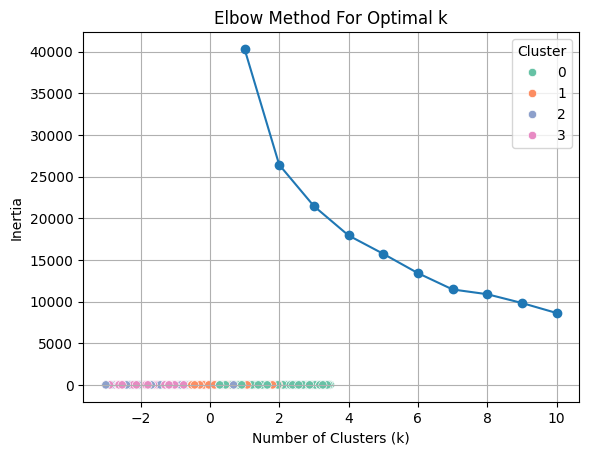

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


9. Apply KMeans Clustering (k = 4)

In [98]:
k = 4  # Change based on elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


10. Visualize Clusters (Age vs Spending Score)

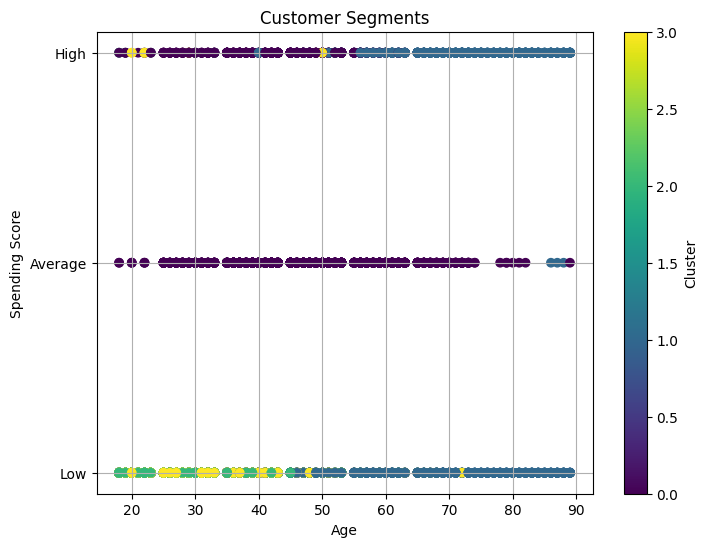

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


11. Install Streamlit and Other Dependencies (Manual)

In [100]:
!pip install streamlit
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

12. Install Streamlit + Pyngrok (Simplified)

In [101]:
!pip install streamlit pyngrok --quiet


13. Build Streamlit App (customer_segmentation_app.py)

In [107]:
%%writefile customer_segmentation_app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Set Streamlit page config
st.set_page_config(page_title="Customer Segmentation", layout="wide")
st.title("🧠 Customer Segmentation App")

# Load dataset
@st.cache_data
def load_data():
    path = "/root/.cache/kagglehub/datasets/vetrirah/customer/versions/1/Train.csv"
    return pd.read_csv(path)

df = load_data()
st.subheader("📊 Raw Dataset")
st.dataframe(df)

# Encode categorical variables
df_encoded = df.copy()
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Normalize and encode Spending_Score properly (case-sensitive)
spending_map = {'Low': 1, 'Average': 2, 'High': 3}
df_encoded['Spending_Score'] = (
    df_encoded['Spending_Score']
    .astype(str)
    .str.strip()
    .map(spending_map)
)

# Drop rows where mapping failed or any other missing values
df_encoded.dropna(subset=['Spending_Score'], inplace=True)
df_encoded.dropna(inplace=True)

# Features to scale (make sure all are numeric now)
features = ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[features])

# Elbow method to determine optimal k
def plot_elbow(data):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    fig, ax = plt.subplots()
    ax.plot(range(1, 11), sse, marker='o')
    ax.set_xlabel("Number of Clusters (K)")
    ax.set_ylabel("SSE (Inertia)")
    ax.set_title("Elbow Method to Choose Optimal Clusters")
    return fig

with st.expander("📈 Elbow Method Plot"):
    fig = plot_elbow(scaled_data)
    st.pyplot(fig)

# Clustering
k = st.slider("Select number of clusters", 2, 10, 4)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df_encoded['Cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_encoded['PCA1'] = pca_result[:, 0]
df_encoded['PCA2'] = pca_result[:, 1]

# Visualization
st.subheader("🌀 Cluster Visualization (2D PCA)")
fig2, ax2 = plt.subplots()
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', ax=ax2)
ax2.set_title("Customer Segments Based on Features")
st.pyplot(fig2)

# Show final dataset
st.subheader("📋 Clustered Dataset Preview")
st.dataframe(df_encoded[['ID', 'Age', 'Spending_Score', 'Family_Size', 'Cluster']])

# Option to download
@st.cache_data
def convert_df(df):
    return df.to_csv(index=False).encode('utf-8')

csv = convert_df(df_encoded)
st.download_button("📥 Download Clustered Data", csv, "clustered_customers.csv", "text/csv")


Overwriting customer_segmentation_app.py


14. Set ngrok Auth Token

In [108]:
from pyngrok import ngrok

# Replace this with YOUR token from ngrok dashboard
ngrok.set_auth_token("Your_Token_Here")


 15. Kill Any Previous ngrok Tunnels

In [109]:
!pkill -f ngrok


16. Launch Streamlit App and Get Public URL

In [110]:
# Run Streamlit in background
!streamlit run customer_segmentation_app.py &> /dev/null &

# Wait a few seconds
import time
time.sleep(5)

# Open tunnel
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🌐 Your Streamlit app is live at:", public_url)


🌐 Your Streamlit app is live at: NgrokTunnel: "https://a7e22ac1bc17.ngrok-free.app" -> "http://localhost:8501"
